# NLP Tutorial


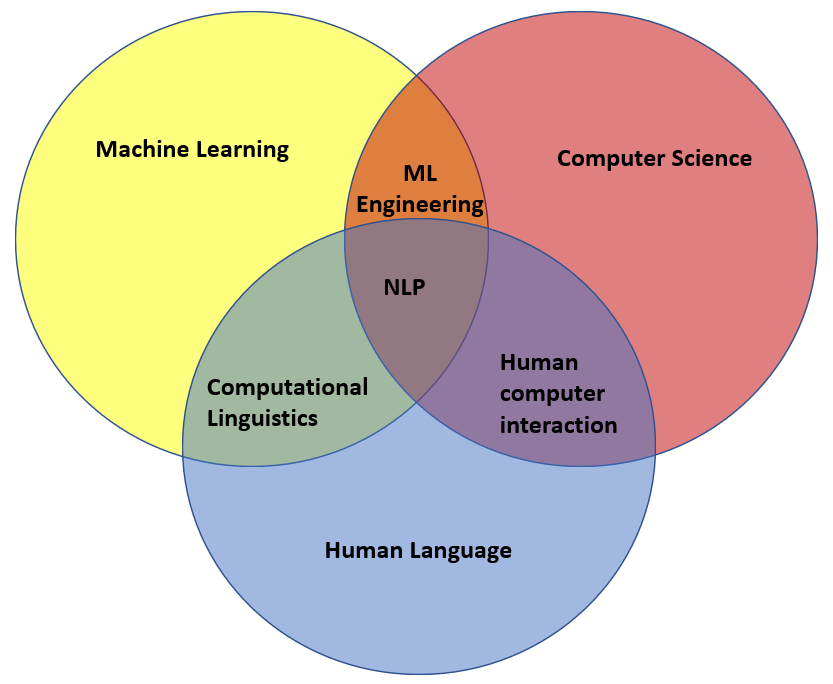

NLP stands for Natural Language Processing, which is a field of artificial intelligence and computer science focused on the interactions between computers and humans using natural language.<br><br>
NLP involves teaching computers to understand, interpret, and generate human language using various techniques and algorithms.

## Components of NLP
### * Segmentation and Tokenization
### * Stemming and Lemmatization
### * Parts of Speech Tagging
### * Named Entity Resolution
## NLP Algorithms
### * Coreference (anamorpha) Resolution
### * Sentiment Analysis
### * Machine Translation
### * Text to Speech and Speech to Text
### * Information Extraction
### * Language Modeling

## Components
### Segmentation and Tokenization

In natural language processing (NLP), segmentation and tokenization are two important components for processing text. Segmentation is the process of dividing text into meaningful units that can be further processed, while tokenization is the process of breaking down these units into individual pieces of information, such as words or symbols. In this tutorial, we will be exploring how to apply segmentation and tokenization to text using Python. 
#### Import Libraries and load data

In [1]:
'''
First, we need to import the necessary libraries for our project. 
We will be using the `nltk` library, which contains a large collection of tools for processing natural language.
'''
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize
from nltk import WordPunctTokenizer

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd
import re
import numpy as np

import spacy
from spacy import displacy
#!pip install allennlp --user
#!pip install allennlp-models --pre --user
from allennlp.predictors.predictor import Predictor
from textblob import TextBlob
import openai
from deep_translator import GoogleTranslator
#!pip install git+https://github.com/openai/whisper.git --user
import whisper
import torch
import tqdm
from pytube import YouTube
#!pip install azure-cognitiveservices-speech
import os
import azure.cognitiveservices.speech as speechsdk
import networkx as nx
from pyvis.network import Network
from networkx_query import search_nodes, search_edges

import arxiv
from arxiv import SortCriterion, SortOrder
import csv
# requires java: conda install -c conda-forge openjdk
from tika import parser
import string
from string import punctuation

from gensim.models.fasttext import FastText
import fasttext.util
from sklearn.decomposition import PCA
# pip install umap-learn
import umap

C:\ProgramData\Miniconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\ProgramData\Miniconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\ProgramData\Miniconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\ProgramData\Miniconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
# required data and model downloads
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('omw-1.4')
en_stop = set(nltk.corpus.stopwords.words('english'))
#!python -m spacy download en_core_web_sm
#model_url = "https://storage.googleapis.com/allennlp-public-models/coref-spanbert-large-2020.02.27.tar.gz"
model_url = "coref-spanbert-large-2020.02.27.tar.gz"
predictor = Predictor.from_path(model_url)

# determine if a GPU device is available and load the model
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)
model = whisper.load_model("small").to(device)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ldqz\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\ldqz\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ldqz\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ldqz\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ldqz\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\ldqz\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
error loading

cpu


In [ ]:
# keys
# Azure Instance
#openai.api_key = ""
# your endpoint should look like the following https://YOUR_RESOURCE_NAME.openai.azure.com/
#openai.api_base =  "" 
#openai.api_version = '' # this may change in the future
openai.api_type = 'azure'

In [3]:
# load some data, let's just use something consistently for this tutorial.
nlp_tutorial_text = '''Texaco Mike went window shopping yesterday and spotted a
nice cup. He wanted to buy it, but he had no money
with him. The following day, he went to the shop and
bought the coveted cup. However, once back home and
in his kitchen, he put the cup on the plate and broke it.'''

#### Segmentation
Once we have our text data, we can begin the segmentation process. Segmentation involves dividing the text into meaningful units, such as sentences or paragraphs. In this case, we will be using the `sent_tokenize` function to divide the text into sentences.  The library documentation is a great resource to understand how to use it: https://www.nltk.org/api/nltk.tokenize.html <br><br>
Often segementation is included in tokenization modules because the two methods are used together.

In [6]:
sentences = nltk.sent_tokenize(nlp_tutorial_text)
sentences

['Texaco Mike went window shopping yesterday and spotted a\nnice cup.',
 'He wanted to buy it, but he had no money\nwith him.',
 'The following day, he went to the shop and\nbought the coveted cup.',
 'However, once back home and\nin his kitchen, he put the cup on the plate and broke it.']

In [7]:
# Segmentation creates a list of sentences, but each item contains new line characters
# which should be replaced with a space.  This can be an art form.
def remove_newline(list):
    newlist = []
    for sentence in list:
        newlist.append(sentence.replace('\n', ' '))
    return newlist

sentences = remove_newline(sentences)
sentences

['Texaco Mike went window shopping yesterday and spotted a nice cup.',
 'He wanted to buy it, but he had no money with him.',
 'The following day, he went to the shop and bought the coveted cup.',
 'However, once back home and in his kitchen, he put the cup on the plate and broke it.']

#### Tokenization
Now that we have our text divided into sentences, we can use the `word_tokenize` function to tokenize the text, which involves breaking down each sentence into individual words or symbols.

In [8]:
tokens = [nltk.word_tokenize(sent) for sent in sentences]
tokens

[['Texaco',
  'Mike',
  'went',
  'window',
  'shopping',
  'yesterday',
  'and',
  'spotted',
  'a',
  'nice',
  'cup',
  '.'],
 ['He',
  'wanted',
  'to',
  'buy',
  'it',
  ',',
  'but',
  'he',
  'had',
  'no',
  'money',
  'with',
  'him',
  '.'],
 ['The',
  'following',
  'day',
  ',',
  'he',
  'went',
  'to',
  'the',
  'shop',
  'and',
  'bought',
  'the',
  'coveted',
  'cup',
  '.'],
 ['However',
  ',',
  'once',
  'back',
  'home',
  'and',
  'in',
  'his',
  'kitchen',
  ',',
  'he',
  'put',
  'the',
  'cup',
  'on',
  'the',
  'plate',
  'and',
  'broke',
  'it',
  '.']]

#### Visualization
We can visualize our results to see the effect of the segmentation and tokenization process. We can use the `matplotlib` library to create a bar chart of the most common words in the text.

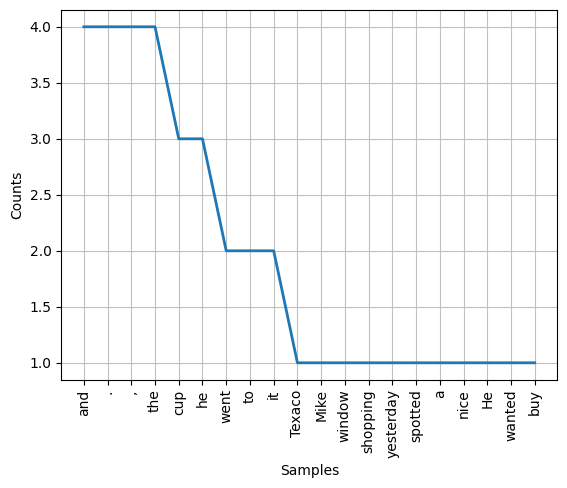

In [9]:
# Calculate the frequency of each word and plot it
word_freq = nltk.FreqDist([word for sent in tokens for word in sent])

# Plot the most common words
word_freq.plot(20)
plt.show()

### Stemming and lemmatization
We will stem the tokens. Stemming involves removing the suffixes of a word to get its root form.

In [10]:
stemmer = nltk.PorterStemmer()
tokens = nltk.word_tokenize(nlp_tutorial_text)
stemmed_tokens = [stemmer.stem(token) for token in tokens]
stemmed_tokens

['texaco',
 'mike',
 'went',
 'window',
 'shop',
 'yesterday',
 'and',
 'spot',
 'a',
 'nice',
 'cup',
 '.',
 'he',
 'want',
 'to',
 'buy',
 'it',
 ',',
 'but',
 'he',
 'had',
 'no',
 'money',
 'with',
 'him',
 '.',
 'the',
 'follow',
 'day',
 ',',
 'he',
 'went',
 'to',
 'the',
 'shop',
 'and',
 'bought',
 'the',
 'covet',
 'cup',
 '.',
 'howev',
 ',',
 'onc',
 'back',
 'home',
 'and',
 'in',
 'hi',
 'kitchen',
 ',',
 'he',
 'put',
 'the',
 'cup',
 'on',
 'the',
 'plate',
 'and',
 'broke',
 'it',
 '.']

We will lemmatize the tokens. Lemmatization is the process of grouping together the inflected forms of a word so they can be analysed as a single item.

In [11]:
lemmatizer = WordNetLemmatizer()
lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
lemmatized_tokens

['Texaco',
 'Mike',
 'went',
 'window',
 'shopping',
 'yesterday',
 'and',
 'spotted',
 'a',
 'nice',
 'cup',
 '.',
 'He',
 'wanted',
 'to',
 'buy',
 'it',
 ',',
 'but',
 'he',
 'had',
 'no',
 'money',
 'with',
 'him',
 '.',
 'The',
 'following',
 'day',
 ',',
 'he',
 'went',
 'to',
 'the',
 'shop',
 'and',
 'bought',
 'the',
 'coveted',
 'cup',
 '.',
 'However',
 ',',
 'once',
 'back',
 'home',
 'and',
 'in',
 'his',
 'kitchen',
 ',',
 'he',
 'put',
 'the',
 'cup',
 'on',
 'the',
 'plate',
 'and',
 'broke',
 'it',
 '.']

#### Visualization

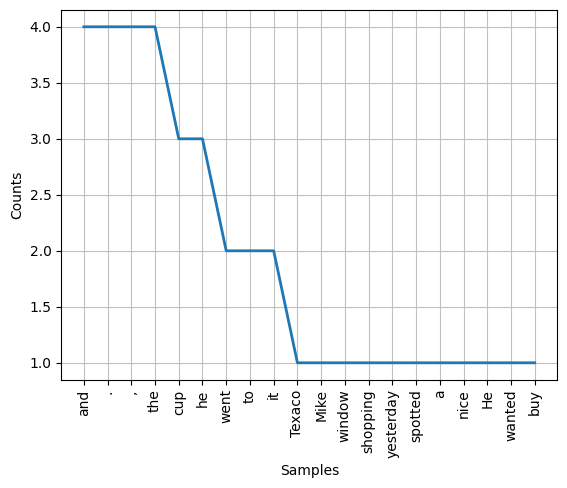

In [12]:
# Calculate the frequency of each lemmatized word and plot it
word_freq = nltk.FreqDist([word for word in lemmatized_tokens])

# Plot the most common words
word_freq.plot(20)
plt.show()

### Parts of Speech Tagging

In [13]:
# Split the text into individual words and store it in a variable
words = nltk.word_tokenize(nlp_tutorial_text)
# Create a variable to store the parts of speech tags for each word
tags = nltk.pos_tag(words)
# Print the parts of speech tags for each word
print(tags)

[('Texaco', 'NNP'), ('Mike', 'NNP'), ('went', 'VBD'), ('window', 'NN'), ('shopping', 'NN'), ('yesterday', 'NN'), ('and', 'CC'), ('spotted', 'VBD'), ('a', 'DT'), ('nice', 'JJ'), ('cup', 'NN'), ('.', '.'), ('He', 'PRP'), ('wanted', 'VBD'), ('to', 'TO'), ('buy', 'VB'), ('it', 'PRP'), (',', ','), ('but', 'CC'), ('he', 'PRP'), ('had', 'VBD'), ('no', 'DT'), ('money', 'NN'), ('with', 'IN'), ('him', 'PRP'), ('.', '.'), ('The', 'DT'), ('following', 'JJ'), ('day', 'NN'), (',', ','), ('he', 'PRP'), ('went', 'VBD'), ('to', 'TO'), ('the', 'DT'), ('shop', 'NN'), ('and', 'CC'), ('bought', 'VBD'), ('the', 'DT'), ('coveted', 'JJ'), ('cup', 'NN'), ('.', '.'), ('However', 'RB'), (',', ','), ('once', 'RB'), ('back', 'RB'), ('home', 'NN'), ('and', 'CC'), ('in', 'IN'), ('his', 'PRP$'), ('kitchen', 'NN'), (',', ','), ('he', 'PRP'), ('put', 'VBD'), ('the', 'DT'), ('cup', 'NN'), ('on', 'IN'), ('the', 'DT'), ('plate', 'NN'), ('and', 'CC'), ('broke', 'VBD'), ('it', 'PRP'), ('.', '.')]


The POS tagger in the NLTK library outputs specific tags for certain words. The list of POS tags is as follows, with examples of what each POS stands for.

CC coordinating conjunction<br>
CD cardinal digit<br>
DT determiner<br>
EX existential there (like: “there is” … think of it like “there exists”)<br>
FW foreign word<br>
IN preposition/subordinating conjunction<br>
JJ adjective ‘big’<br>
JJR adjective, comparative ‘bigger’<br>
JJS adjective, superlative ‘biggest’<br>
LS list marker 1)<br>
MD modal could, will<br>
NN noun, singular ‘desk’<br>
NNS noun plural ‘desks’<br>
NNP proper noun, singular ‘Harrison’<br>
NNPS proper noun, plural ‘Americans’<br>
PDT predeterminer ‘all the kids’<br>
POS possessive ending parent’s<br>
PRP personal pronoun I, he, she<br>
PRPS possessive pronoun my, his, hers<br>
RB adverb very, silently,<br>
RBR adverb, comparative better<br>
RBS adverb, superlative best<br>
RP particle give up<br>
TO, to go ‘to’ the store.<br>
UH interjection, errrrrrrrm<br>
VB verb, base form take<br>
VBD verb, past tense took<br>
VBG verb, gerund/present participle taking<br>
VBN verb, past participle taken<br>
VBP verb, sing. present, non-3d take<br>
VBZ verb, 3rd person sing. present takes<br>
WDT wh-determiner which<br>
WP wh-pronoun who, what<br>
WPS possessive wh-pronoun whose<br>
WRB wh-abverb where, when<br>

#### Visualization

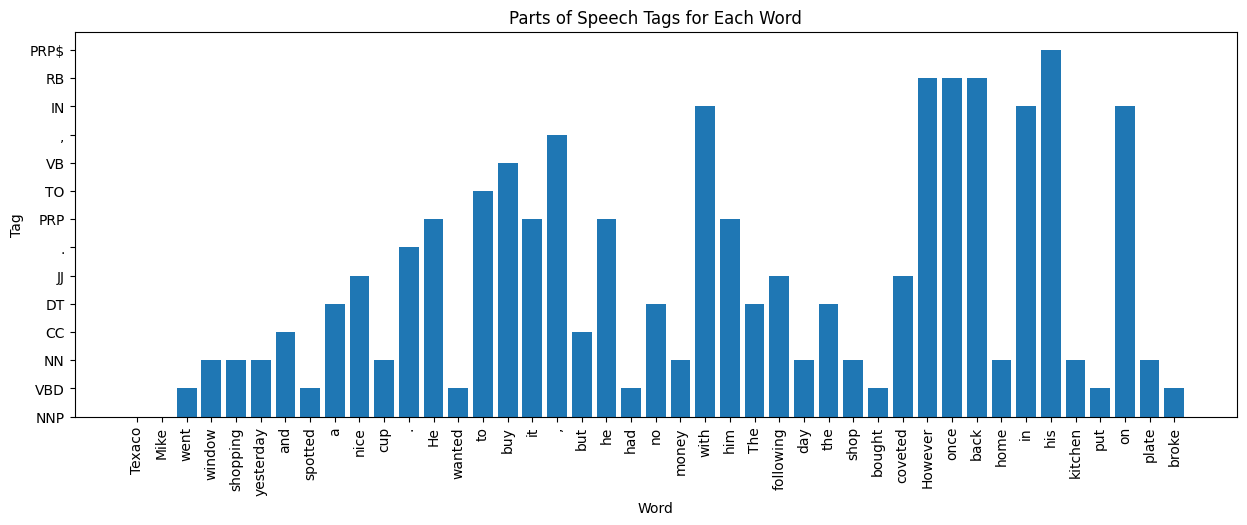

In [14]:
nltk.pos_tag(words)
tags_words = [t for w, t in tags]

plt.figure(figsize=(15,5))
plt.title('Parts of Speech Tags for Each Word')
plt.xlabel('Word')
plt.ylabel('Tag')
plt.bar(words, tags_words)
plt.xticks(rotation=90)

plt.show()

NLTK is mostly a rules based library.   Let's do the same thing with the Spacy library, which includes ML.

In [15]:
# create spacy nlp model
nlp = spacy.load("en_core_web_sm")
doc = nlp(nlp_tutorial_text)

#### Visualization

In [16]:
displacy.render(doc, style="dep")

### Named entity resolution
Using the SpaCy model, we will now identify the entities in the text. To do this, we will loop through each token in the tokenized text, and then check if it is an entity.

In [17]:
for token in doc:
    if token.ent_type_ != '':
        print(token.text, token.ent_type_)

Texaco PERSON
Mike PERSON
yesterday DATE


Resolve the entities by assigning them to a specific type. This can be done using the built-in spaCy entity types or using custom entity types. 

In [18]:
for token in doc: 
    if token.ent_type_ == 'PERSON':
        token.ent_type_ = 'NAME'
    if token.ent_type_ != '':
        print(token.text, token.ent_type_)

Texaco NAME
Mike NAME
yesterday DATE


### Coreference (anamorpha) Resolution

Coreference resolution (also known as anaphora resolution) is an essential part of Natural language processing (NLP) as it helps determine the meaning of a sentence or text by finding the relationships between words or phrases. This process enables computers to better understand and interpret the meaning of text, allowing them to better interpret the context and meaning of conversations, and more accurately interpret commands. Coreference resolution is particularly important for tasks such as machine translation, question-answering, and text summarization, as it helps to improve the accuracy of these tasks by providing more context to the text.

In [19]:
prediction = predictor.predict(document=nlp_tutorial_text)  # get prediction
print("Spacy clsuters:-")
for cluster in prediction['clusters']:
    print(cluster)  # list of clusters (the indices of spaCy tokens)
print('\n\n') #Newline
resolved_nlp_tutorial_text = predictor.coref_resolved(nlp_tutorial_text)
print('Coref resolved: ',resolved_nlp_tutorial_text)  

Spacy clsuters:-
[[0, 1], [13, 13], [20, 20], [26, 26], [32, 32], [52, 52], [55, 55]]
[[8, 11], [17, 17], [40, 42], [57, 58], [64, 64]]



Coref resolved:  Texaco Mike went window shopping yesterday and spotted a
nice cup. Texaco Mike wanted to buy a
nice cup, but Texaco Mike had no money
with Texaco Mike. The following day, Texaco Mike went to the shop and
bought a
nice cup. However, once back home and
in Texaco Mike's kitchen, Texaco Mike put a
nice cup on the plate and broke a
nice cup.


Coreference resolution is difficult.  When accuracy is important, creating custom models may be needed.  This blog is a useful guide: https://towardsdatascience.com/how-to-make-an-effective-coreference-resolution-model-55875d2b5f19

### Sentiment Analysis
There are diverse methods and models for sentiment analysis.  We'll look at a lightweight approach that uses NLTK and TextBlob along with an OpenAI method that is easily customizeable.  We'll use the anamorpha resolved text.

In [20]:
# Tokenize text
nlp_tokens = nltk.word_tokenize(resolved_nlp_tutorial_text)
# Tag the tokens
nlp_tagged = nltk.pos_tag(nlp_tokens)
# Extract nouns
nlp_nouns = [word for word, pos in nlp_tagged if pos == 'NN']
# Calculate the sentiment score
nlp_sentiment = TextBlob(' '.join(nlp_nouns)).sentiment
# Define score meaning
def getAnalysis(score):
    score = int(score)
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'
# Print the score
print('Polarity: ', getAnalysis(nlp_sentiment.polarity))
print('Subjectivity: ',getAnalysis(nlp_sentiment.subjectivity))

Polarity:  Neutral
Subjectivity:  Neutral


#### OpenAI use
OpenAI makes available general language models with an API.  There are costs associated with every API call based on the number of tokens (subwords) that includes the input and output.   The input is a prompt that includes the desired text.  The output is what is generated.  The current most advanced model is gpt-3.5-turbo (engine for ChatGPT) and the smallest/fastest is Ada.  ChatGPT engine costs 0.002 per 1k tokens and Ada costs 0.0004 per 1k tokens.  Custom trained models cost 4 times as much to use, plus the costs of training.

In [21]:
model_deployment = 'nlp_tutorial_ada1'

def classify_sentiment(text):
    response = ""
    prompt = "Decide whether text sentiment is positive, netural, or negative.\n\nText: "+text+"\n\nSentiment:"
    response = openai.Completion.create(
            engine=model_deployment,
            prompt=prompt,
            temperature=0,
            max_tokens=60
        )
    result = response.choices[0].text.strip()
    return result

In [22]:
classify_sentiment(resolved_nlp_tutorial_text)

'negative'

### Machine Translation
There are diverse models for translation.  We'll use an efficient general model from OpenAI and a specific model.  Approaches will depend on use.  Legal and engineering applications often require costly solutions for guaranteed accuracy.

In [23]:
def translate_to_german(text):
    response = ""
    prompt = "Translate this text to German.  Text: "+text+"\n\nGerman:"
    response = openai.Completion.create(
            engine=model_deployment,
            prompt=prompt,
            temperature=0,
            max_tokens=1000
        )
    result = response.choices[0].text.strip()
    return result

In [24]:
translated_text = translate_to_german(resolved_nlp_tutorial_text)
translated_text

'Texaco Mike kam heute durch die Straßen und sah ein\nGebilde. Texaco Mike wollte aber nicht zu den Käufern wechseln,\nsondern lieber ein anderes Gebilde wechseln wollen. So kam er zu Texaco Mikes und kaufte ein\nGebilde. Doch dessen Küchentisch hat Texaco Mike schon gefällt und brach ein\nGebilde.'

In [25]:
translated = GoogleTranslator(source='auto', target='de').translate(resolved_nlp_tutorial_text)
translated

'Texaco Mike war gestern beim Schaufensterbummel und entdeckte a\nschöne Tasse. Texaco Mike wollte einen kaufen\nschöne Tasse, aber Texaco Mike hatte kein Geld\nmit Texaco Mike. Am nächsten Tag ging Texaco Mike in den Laden und\nkaufte ein\nschöne Tasse. Doch einmal wieder nach Hause und\nin Texaco Mikes Küche stellte Texaco Mike ein\nschöne Tasse auf dem Teller und brach ein\nschöne Tasse.'

### Speech to Text
The open source OpenAI whisper model works well for private speech to text applications, such as obtaining transcriptions from audio/video

In [26]:
# determine if a GPU device is available and load the model
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

model = whisper.load_model("small").to(device)

cpu


In [27]:
# for audio, let's extract it from a Chevron youtube video https://www.youtube.com/watch?v=oaAozDq9mYw
def save_audio_from_videoIDs(save_path, videoID):
    check_file = f"{save_path}/{videoID}.mp3"

    # url of video to be downloaded
    url = f"https://youtu.be/{videoID}"

    # try to create a YouTube vid object
    try:
        yt = YouTube(url)
    except RegexMatchError:
        print(f"RegexMatchError for '{url}'")

    itag = None
    # we only want audio files
    files = yt.streams.filter(only_audio=True)
    for file in files:
        # and of those audio files we grab the first audio for mp4 (eg mp3)
        if file.mime_type == 'audio/mp4':
            itag = file.itag
            break
    if itag is None:
        # just incase no MP3 audio is found (shouldn't happen)
        print("NO MP3 AUDIO FOUND")

    # get the correct mp3 'stream'
    stream = yt.streams.get_by_itag(itag)
    # downloading the audio
    filename=f"{videoID}.mp3"
    try:
        # only download mp3 if it does not exist
        stream.download(output_path=save_path, filename=filename)
    except:
        print(f"error downloading audio for video ID {videoID}")
        
    return filename

In [28]:
filename = save_audio_from_videoIDs('.', 'oaAozDq9mYw')

In [29]:
result = model.transcribe(filename)
result

C:\Users\ldqz\AppData\Roaming\Python\Python39\site-packages\whisper\transcribe.py:114: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


{'text': " At Chevron, we're working to help reduce the carbon intensity of the fuels that keep things moving. That's why we're producing renewable diesel that can be used in existing diesel tanks.",
 'segments': [{'id': 0,
   'seek': 0,
   'start': 0.0,
   'end': 6.0,
   'text': " At Chevron, we're working to help reduce the carbon intensity of the fuels that keep things moving.",
   'tokens': [50364,
    1711,
    44236,
    2044,
    11,
    321,
    434,
    1364,
    281,
    854,
    5407,
    264,
    5954,
    13749,
    295,
    264,
    24616,
    300,
    1066,
    721,
    2684,
    13,
    50664],
   'temperature': 0.0,
   'avg_logprob': -0.13204306225443996,
   'compression_ratio': 1.3576642335766422,
   'no_speech_prob': 0.008325882256031036},
  {'id': 1,
   'seek': 0,
   'start': 6.0,
   'end': 11.0,
   'text': " That's why we're producing renewable diesel that can be used in existing diesel tanks.",
   'tokens': [50664,
    663,
    311,
    983,
    321,
    434,
    

In [30]:
text_list = []
text = ""
for item in result['segments']:
    text_list.append(item['text'])
    text = text + " "+item['text']
text

"  At Chevron, we're working to help reduce the carbon intensity of the fuels that keep things moving.  That's why we're producing renewable diesel that can be used in existing diesel tanks."

### Text to Speech
There are many different approaches to text to speech, each with tradeoffs.  In general, high quality requires more intensive computations.  There are open source models that enable emotional speech, voice cloning, etc.  Third party commercial services are recommended, such as MSFT's text to voice API. For high quality voice generation, tortoiseTTS is a good option, but requires a high end GPU.  Well use the MSFT API in this example.

In [31]:
speech_config = speechsdk.SpeechConfig(subscription='', region='')
audio_config = speechsdk.audio.AudioOutputConfig(use_default_speaker=True)

In [32]:
# The language of the voice that speaks.
speech_config.speech_synthesis_voice_name='en-US-JennyNeural'
speech_synthesizer = speechsdk.SpeechSynthesizer(speech_config=speech_config, audio_config=audio_config)

speech_synthesis_result = speech_synthesizer.speak_text_async(text).get()

if speech_synthesis_result.reason == speechsdk.ResultReason.SynthesizingAudioCompleted:
    print("Speech synthesized for text [{}]".format(text))
elif speech_synthesis_result.reason == speechsdk.ResultReason.Canceled:
    cancellation_details = speech_synthesis_result.cancellation_details
    print("Speech synthesis canceled: {}".format(cancellation_details.reason))
    if cancellation_details.reason == speechsdk.CancellationReason.Error:
        if cancellation_details.error_details:
            print("Error details: {}".format(cancellation_details.error_details))
            print("Did you set the speech resource key and region values?")

Speech synthesized for text [  At Chevron, we're working to help reduce the carbon intensity of the fuels that keep things moving.  That's why we're producing renewable diesel that can be used in existing diesel tanks.]


### Information Extraction

Information extraction is a crucial component of Natural Language Processing. It involves extracting structured data from unstructured text, such as recognizing entities and relations from text. This data can be used to create knowledge graphs, which are a powerful way to represent and visualize data. Knowledge graphs can help identify relationships among entities and allow for easier analysis of large amounts of data. By combining information extraction with knowledge graphs, NLP can be used to gain insights from large amounts of text data and to create more powerful AI applications.

In [33]:
# tokenize text
tokenized_text = nltk.word_tokenize(nlp_tutorial_text)
# tag tokens
tagged_tokens = nltk.pos_tag(tokenized_text)
# define rules In this example, we want to extract the subject, verb, and object of each sentence. 
# To do this, we will use regular expressions to define patterns for each part of the sentence.
subject_pattern = r'^(NNP)'
verb_pattern = r'(VBD|VBP|VBZ)'
object_pattern = r'(NN|NNP)'
# Extract the information
subjects = []
verbs = []
objects = []

for token in tagged_tokens:
    subject_match = re.match(subject_pattern, token[1])
    if subject_match:
        subjects.append(token[0])
    verb_match = re.match(verb_pattern, token[1])
    if verb_match:
        verbs.append(token[0])
    object_match = re.match(object_pattern, token[1])
    if object_match:
        objects.append(token[0])

In [34]:
print('Subjects:', subjects)
print('Verbs:', verbs)
print('Objects:', objects)

Subjects: ['Texaco', 'Mike']
Verbs: ['went', 'spotted', 'wanted', 'had', 'went', 'bought', 'put', 'broke']
Objects: ['Texaco', 'Mike', 'window', 'shopping', 'yesterday', 'cup', 'money', 'day', 'shop', 'cup', 'home', 'kitchen', 'cup', 'plate']


### Knowledge Graph
Knowledge graphs can be constructed from triples (subject, verb, objects), which can used for insightful analysis.

In [35]:
def processSentence(sentence):
    tokens = nlp(sentence)
    return processSubjectObjectPairs(tokens)

def processSubjectObjectPairs(tokens):
    subject = ''
    object = ''
    relation = ''
    subjectConstruction = ''
    objectConstruction = ''
    for token in tokens:
        #printToken(token)
        if "punct" in token.dep_:
            continue
        if isRelationCandidate(token):
            relation = appendChunk(relation, token.lemma_)
        if isConstructionCandidate(token):
            if subjectConstruction:
                subjectConstruction = appendChunk(subjectConstruction, token.text)
            if objectConstruction:
                objectConstruction = appendChunk(objectConstruction, token.text)
        if "subj" in token.dep_:
            subject = appendChunk(subject, token.text)
            subject = appendChunk(subjectConstruction, subject)
            subjectConstruction = ''
        if "obj" in token.dep_:
            object = appendChunk(object, token.text)
            object = appendChunk(objectConstruction, object)
            objectConstruction = ''

    triple = [str(subject.strip()), str(relation.strip()), str(object.strip())]
    if(triple.count('') < 2):
        return triple
    
def isConstructionCandidate(token):
    deps = ["compound", "prep", "conj", "mod"]
    return any(subs in token.dep_ for subs in deps)

def isRelationCandidate(token):
    deps = ["ROOT", "adj", "attr", "agent", "amod"]
    return any(subs in token.dep_ for subs in deps)

def appendChunk(original, chunk):
    return original + ' ' + chunk

def printGraph(triples):
    G = nx.Graph()
    for triple in triples:
        G.add_node(triple[0])
        G.add_node(triple[1])
        G.add_node(triple[2])
        G.add_edge(triple[0], triple[1])
        G.add_edge(triple[1], triple[2])

    pos = nx.spring_layout(G)
    plt.figure()
    nx.draw(G, pos, edge_color='black', width=1, linewidths=1,
            node_size=500, node_color='seagreen', alpha=0.9,
            labels={node: node for node in G.nodes()})
    plt.axis('off')
    plt.show()

In [36]:
sentences = nltk.sent_tokenize(nlp_tutorial_text)
sentences = remove_newline(sentences)

In [37]:
triples = []
for sentence in sentences:
    triple = processSentence(sentence)
    if triple:
        triples.append(triple)

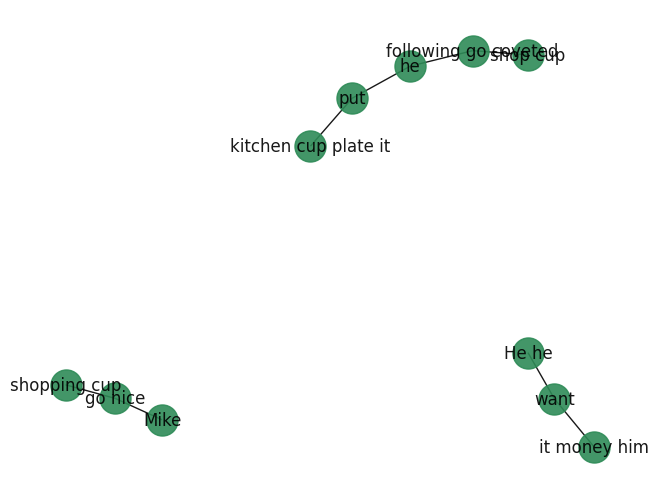

In [38]:
printGraph(triples)

In [39]:
# it's possible to have GPT models create the triples
def create_triples(text):
    response = ""
    prompt = "Extract subject, verb, and object triples from the following text.  Text: "+text+"\n\nTriples (subject, verb, object):"
    response = openai.Completion.create(
            engine='CXV_ChatGPT',
            prompt=prompt,
            temperature=0.01,
            max_tokens=500,
            stop= "\n\n"
        )
    result = response.choices[0].text.strip()
    return result

In [40]:
triples = create_triples(resolved_nlp_tutorial_text)
triples

'- (Texaco Mike, went, window shopping)\n- (Texaco Mike, spotted, nice cup)\n- (Texaco Mike, wanted, buy nice cup)\n- (Texaco Mike, had, no money)\n- (Texaco Mike, went, shop)\n- (Texaco Mike, bought, nice cup)\n- (Texaco Mike, put, nice cup)\n- (Texaco Mike, broke, nice cup)<|im_end|>'

In [41]:
def extract_triple(text):
    triple_list = []
    for line in text.split('\n'):
        triple = line.replace('(', '').replace(')','').replace('- ','').replace('<|im_end|>','').split(', ')
        triple_list.append(tuple(triple))
    return triple_list

In [42]:
triples_list = extract_triple(triples)
triples_list

[('Texaco Mike', 'went', 'window shopping'),
 ('Texaco Mike', 'spotted', 'nice cup'),
 ('Texaco Mike', 'wanted', 'buy nice cup'),
 ('Texaco Mike', 'had', 'no money'),
 ('Texaco Mike', 'went', 'shop'),
 ('Texaco Mike', 'bought', 'nice cup'),
 ('Texaco Mike', 'put', 'nice cup'),
 ('Texaco Mike', 'broke', 'nice cup')]

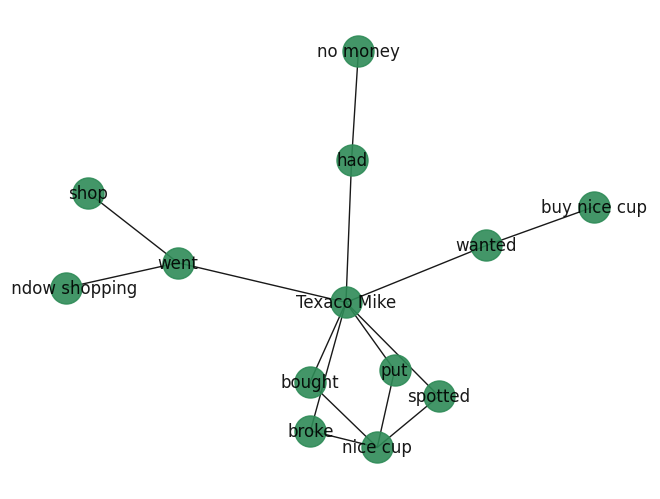

In [43]:
printGraph(triples_list)

In [44]:
triples = []
triple_dict = {"source":[], "relation":[], "target":[]}
for triple in triples_list:
    triples.append(triple)
    triple_dict["source"].append(triple[0])
    triple_dict["relation"].append(triple[1])
    triple_dict["target"].append(triple[2])

In [45]:
kg_df = pd.DataFrame(triple_dict)
kg_df.drop_duplicates(inplace=True)

In [46]:
kg_df

,source,relation,target
0,Texaco Mike,went,window shopping
1,Texaco Mike,spotted,nice cup
2,Texaco Mike,wanted,buy nice cup
3,Texaco Mike,had,no money
4,Texaco Mike,went,shop
5,Texaco Mike,bought,nice cup
6,Texaco Mike,put,nice cup
7,Texaco Mike,broke,nice cup


In [47]:
def dashboard(kg_df):
    """
    This function takes in a dataframe of SVO triples and visualises a knowledge graph
    in HTML, showing all nodes (subject-object pairs) and edges (relations).

    Arguments:
    kg_df (pandas.DataFrame): dataframe of triples generated from text file

    Returns:
    net (network): a network graph visualisation of all connecting nodes and edges
    """

    source_list = kg_df["source"].values.tolist()
    relation_list = kg_df["relation"].values.tolist()
    target_list = kg_df["target"].values.tolist()

    net = Network(notebook=True)
    G = nx.from_pandas_edgelist(kg_df, 'source', 'target', edge_attr=True, create_using=nx.MultiDiGraph)

    net.show_buttons(filter_=['nodes', 'edges'])

    for node in G.nodes():
        net.add_node(node)

    for edge in G.edges():
        net.add_edge(edge[0], edge[1], label=relation_list[target_list.index(str(edge[1]))])

    net.save_graph('nx.html')

    return net.show('nx.html'), G

In [48]:
visual, graph = dashboard(kg_df)

nx.html


In [49]:
visual

In [50]:
graph

In [51]:
# search nodes for connected nodes
def query_graph(G, node_name): 
    '''
    This function queries a networkX graph G for connected nodes given the text of a node name.
    :param G: the graph to be queried
    :param node_name: the node whose connections are being queried
    :return: a list of nodes connected to the given node
    '''
  
    connected_nodes = []
  
    for n in G.nodes():
        # Check if the node name matches
        if n == node_name:
            # If it does, get the connected nodes
            connected_nodes = list(G.neighbors(n))
            break
  
    return connected_nodes

In [52]:
query_graph(graph, "Texaco Mike")

['window shopping', 'nice cup', 'buy nice cup', 'no money', 'shop']

In [53]:
# search edges

def query_graph_by_edge_label(graph, edge_label):
    '''
    Function to query a networkX graph for nodes connected by a specified edge label
    
    Parameters:
    graph (networkX Graph): NetworkX graph
    edge_label (string): Edge label to query
    
    Returns:
    List of tuples: List of tuples containing the nodes connected by the edge label
    '''
    
    # Create an empty list to store the nodes
    nodes_connected_by_edge_label = []
    
    # Iterate through the edges of the graph
    for u, v, l in graph.edges(data=True):
        # Check if edge label matches
        if l['relation'] == edge_label:
            # Add the nodes to the list
            nodes_connected_by_edge_label.append((u, v))
        
    # Return the list of nodes
    return nodes_connected_by_edge_label

In [54]:
result_nodes = query_graph_by_edge_label(graph, 'went')
result_nodes

[('Texaco Mike', 'window shopping'), ('Texaco Mike', 'shop')]

In [55]:
# who went?
who_went = []
for result in result_nodes:
    who_went.append(result[0])
who_went = set(who_went)
who_went

{'Texaco Mike'}

In [56]:
# what places did they go?
places = []
for result in result_nodes:
    places.append(result[1])
places = set(places)
places

{'shop', 'window shopping'}

Let's query for the node with the most connections

In [57]:
def most_connected_node(G):
    max_degree = 0
    max_node = None
    for node in G.nodes():
        degree = G.degree(node)
        if degree > max_degree:
            max_degree = degree
            max_node = node
    return max_node

In [58]:
node = most_connected_node(graph)
node

'Texaco Mike'

### Language Modeling Example
Lets create a custom language model from, starting from fine tuning an existing model on domain specific content.  We can create domain specific content using the ARXIV API to download technical papers on a specified subject.

Steps:
1 Create corpus of documents (download from ARXIV)<br>
2 Extract text from documents (Apache Tika)<br>
3 Clean text for fine tuning a specific domain model (custom code)<br>
4 Create a specific domain model (FastText for efficient word vectors)<br>

In [59]:
# create arxiv client
big_slow_client = arxiv.Client(
  page_size = 1000,
  delay_seconds = 10,
  num_retries = 5
)

In [60]:
# create a domain associated with desired search terms
domain = 'Biofuels'
searchterms = ['Biofuels',
             'Renewable Energy',
             'Bioenergy',
             'Biomass',
             'Bioethanol',
             'Biodiesel',
              'Biogas',
              'Algae Fuel']

In [61]:
# the number of dimensions is the number of vectors to create that represent a word
dimensions = 300

document_path = 'arxiv/'+domain
isExist = os.path.exists(document_path)
if not isExist:
   # Create a new directory because it does not exist
   os.makedirs(document_path)
domain_train_file = domain+'_train.txt'

VECTORS_FILEPATH = "cc.en."+str(dimensions)+".vec"
MODEL_NAME = domain+"_model.bin"
PRETRAINED_MODEL = "cc.en."+str(dimensions)+".bin"

In [62]:
# create a function to save papers by removing special characters from the file name
def clean_title(title):
    title = title.replace(" ", "_")
    title = title.replace("\\", "")
    title = title.replace("/", "")
    return title

In [61]:
# get the desired documents, set a limit of 3 for each search term testing and demo
max_papers = 3
for searchterm in searchterms:
    for result in big_slow_client.results(arxiv.Search(query=searchterm, max_results = max_papers, sort_by = SortCriterion.Relevance, sort_order = SortOrder.Ascending)):
        filename = clean_title(result.title)+".pdf"
        try:
            print("downloading paper: "+document_path+"/"+filename)
            result.download_pdf(dirpath=document_path, filename=filename)
        except:
            print("Error downloading paper: "+filename)
            continue

downloading paper: arxiv/Biofuels/Analysis_of_the_Reliability_of_a_Biofuel_Production_Plant_from_Waste_Cooking_Oil.pdf
downloading paper: arxiv/Biofuels/Are_biofuel_mandates_cost-effective?_--_an_analysis_of_transport_fuels_and_biomass_usage_to_achieve_emissions_targets_in_the_European_energy_system.pdf
Error downloading paper: Are_biofuel_mandates_cost-effective?_--_an_analysis_of_transport_fuels_and_biomass_usage_to_achieve_emissions_targets_in_the_European_energy_system.pdf
downloading paper: arxiv/Biofuels/Choice_of_technology_and_evaluation_of_the_production_capabilities_of_a_3d_printer_robot_for_creating_elements_of_experimental_equipment_for_the_production_of_biofuel_components.pdf
downloading paper: arxiv/Biofuels/Pricing_Energy_in_the_Presence_of_Renewables.pdf
downloading paper: arxiv/Biofuels/Control_Strategies_for_Microgrids_with_Renewable_Energy_Generation_and_Battery_Energy_Storage_Systems.pdf
downloading paper: arxiv/Biofuels/The_Benefits_of_Hydrogen_Energy_Transmission_

In [63]:
# specify folder container directory structure for training
def get_folder_names(path):
    """
    Get folder names in a file directory
    """
    return [name for name in os.listdir(path)
            if os.path.isdir(os.path.join(path, name)) and name not in ['.ipynb_checkpoints']]

def get_files_recursive(dir_path):
    files = []
    for (dirpath, dirnames, filenames) in os.walk(dir_path):
        files.extend(filenames)
        for dirname in dirnames:
            dir = os.path.join(dirpath, dirname)
            files.extend(get_files_recursive(dir))
    return files

def get_text(filename, label):
    parsed = parser.from_file(filename, requestOptions={'headers': headers, 'timeout': 300})
    text = parsed["content"]
    if text is not None:
        clean_text = " ".join(text.split())
        return label +" "+clean_text
    return text

def save_list(list_to_save, file_name):
    with open(file_name, 'w') as file_handler:
        for item in list_to_save:
            file_handler.write("{}\n".format(item))

In [64]:
file_data=[]
text=[]
print(document_path)

PDF_filenames = get_files_recursive(document_path)
# Parse data from file
for file_name in PDF_filenames:
    try:
        parsedPDF = parser.from_file(document_path+"/"+file_name, requestOptions={'timeout': 365})
        print(document_path+"/"+file_name)
        # Get files text content
        text.append(parsedPDF["content"])
    except:
        continue

arxiv/Biofuels


2023-04-11 20:02:02,067 [MainThread  ] [WARNI]  Failed to see startup log message; retrying...


arxiv/Biofuels/Analysis_of_the_Reliability_of_a_Biofuel_Production_Plant_from_Waste_Cooking_Oil.pdf
arxiv/Biofuels/An_Insurance_Contract_Design_to_Boost_Storage_Participation_in_the_Electricity_Market.pdf
arxiv/Biofuels/Application_of_polynomial_vector_(pv)_processing_to_improve_the_estimation_performance_of_bio_diesel_in_variable_compression_ratio_diesel_engine.pdf
arxiv/Biofuels/A_Dynamical_Model_of_the_Industrial_Economy_of_the_Humber_Region.pdf
arxiv/Biofuels/A_model_of_anaerobic_digestion_for_biogas_production_using_Abel_equations.pdf
arxiv/Biofuels/A_Multi-stage_Stochastic_Programming_Model_for_Adaptive_Biomass_Processing_Operation_under_Uncertainty.pdf
arxiv/Biofuels/Benchmarking_real-time_monitoring_strategies_for_ethanol_production_from_lignocellulosic_biomass.pdf
arxiv/Biofuels/Biothermoeconomics_analysis_of_cyanobacteria_and_microalga_use_for_sustainable_biofuel.pdf
arxiv/Biofuels/Cell_vibron_polariton_in_the_myelin_sheath_of_nerve.pdf
arxiv/Biofuels/Challenges_and_Opportuni

In [65]:
# clean and prepare text for model training
text_=' '.join([str(elem) for elem in text])
stemmer = WordNetLemmatizer()
remove_punct_dict = dict((ord(punct), None) for punct in string.punctuation)

def preprocess_text(document):
        # Remove all the special characters
        document = re.sub(r'\W', ' ', str(document))
        # remove all single characters
        document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)
        # Remove single characters from the start
        document = re.sub(r'\^[a-zA-Z]\s+', ' ', document)
        # Substituting multiple spaces with single space
        document = re.sub(r'\s+', ' ', document, flags=re.I)
        # Removing prefixed 'b'
        document = re.sub(r'^b\s+', '', document)
        # standardize white space
        document = re.sub(r'\s+', ' ', document)
        # Removing linebreaks '\n'
        document = re.sub(r'[\r\n]+', '', document)
        
        ## remove digits with regular expression
        document = re.sub(r'\d', ' ', document)
        #MM remove any patterns matching standard url format
        url_pattern = r'((http|ftp|https):\/\/)?[\w\-_]+(\.[\w\-_]+)+([\w\-\.,@?^=%&amp;:/~\+#]*[\w\-\@?^=%&amp;/~\+#])?'
        document = re.sub(url_pattern, ' ', document)
        #MM remove all non-ascii characters
        document = ''.join(character for character in document if ord(character)<128)
        #MM filter funny characters, if any.
        printable = set(string.printable)
        document = filter(lambda x: x in printable, document) #filter funny characters, if any.
        document = "".join(list(document))
        

        # Converting to Lowercase
        document = document.lower().translate(remove_punct_dict)
        
        

        # Lemmatization
        tokens = document.split()
        tokens = [stemmer.lemmatize(word) for word in tokens]
        tokens = [word for word in tokens if word not in en_stop]
        #Remove all short words that have a length < 3 character
        tokens = [word for word in tokens if len(word) > 3]
        # remove remaining tokens that are not alphabetic
        tokens = [word for word in tokens if word.isalpha()]

        preprocessed_text = ' '.join(tokens)

        return preprocessed_text

In [66]:
# tokenize text from documents
fileText=sent_tokenize(text_)
# process text
text_review  = [preprocess_text(sentence) for sentence in fileText if sentence.strip() !=''] 
# write processed text to file
with open(domain_train_file, 'w') as f:
    for line in text_review:
        f.write(f"{line}\n")

In [67]:
# define model training parameters
embedding_size = dimensions
window_size = 40
min_word = 3
down_sampling = 1e-2
min_ngrams = 3
max_ngrams = 6
enrich_vectors = 1

In [68]:
# Need to convert the .bin file to a .vec file
# this takes a while
isExist = os.path.exists(VECTORS_FILEPATH)
if not isExist:
    fasttext.util.download_model('en', if_exists='ignore')  # English
    ft = fasttext.load_model('cc.en.300.bin')
    
    lines=[]
    
    # get all words from model
    words = ft.get_words()
    
    with open(VECTORS_FILEPATH,'w') as file_out:
        
        # the first line must contain number of total words and vector dimension
        file_out.write(str(len(words)) + " " + str(ft.get_dimension()) + "\n")
    
        # line by line, you append vectors to VEC file
        for w in words:
            v = ft.get_word_vector(w)
            vstr = ""
            for vi in v:
                vstr += " " + str(vi)
            try:
                file_out.write(w + vstr+'\n')
            except:
                pass

### Feel free to skip the model tuning and saving steps if a model is already available.  Load the existing model

In [69]:
# train (fine-tune) the model
model_ft = fasttext.train_supervised(input=domain_train_file, lr=.1, epoch=20,
                             wordNgrams=max_ngrams, bucket=200000, dim=embedding_size, 
                             pretrainedVectors=VECTORS_FILEPATH)

In [71]:
model_ft.save_model(MODEL_NAME)

In [75]:
model_ft = fasttext.load_model(MODEL_NAME)

In [76]:
result = model_ft.get_nearest_neighbors('biofuel', k=20)
result

[(0.9018698930740356, 'biofuels'),
 (0.8548046946525574, 'bio-fuel'),
 (0.808681070804596, 'biodiesel'),
 (0.7968013882637024, 'bio-fuels'),
 (0.7638882398605347, 'bioethanol'),
 (0.744205892086029, 'bio-diesel'),
 (0.7333471775054932, 'bioenergy'),
 (0.721824586391449, 'biobutanol'),
 (0.719247043132782, 'bio-ethanol'),
 (0.7104288339614868, 'Bio-fuel'),
 (0.705559492111206, 'biojet'),
 (0.7053861618041992, 'Biofuel'),
 (0.7050243020057678, 'biorefineries'),
 (0.701181948184967, 'agrofuel'),
 (0.6995387077331543, 'ethanol'),
 (0.6994848251342773, 'Biofuels'),
 (0.6919269561767578, 'corn-ethanol'),
 (0.6901471018791199, 'biorefinery'),
 (0.6873407363891602, 'biorefining'),
 (0.6815105080604553, 'Bio-fuels')]

In [77]:
print(model_ft['biofuel'])

[-0.07591862  0.07617687 -0.05641749  0.06543173  0.00522029  0.01310629
  0.08130495  0.03844807  0.0842281  -0.0144504   0.07579587  0.04836446
  0.02032649 -0.02536088 -0.03268924  0.02889523  0.01720377  0.01088208
 -0.06196742  0.04466876 -0.02329579 -0.01327281  0.08435132 -0.04700544
  0.00120915 -0.01872908  0.126991    0.06940004  0.01181216  0.19771945
  0.00328136  0.05090215  0.06294985 -0.00634998 -0.00739817  0.04806382
 -0.00442065  0.02530377 -0.01333493  0.01877588  0.04583316 -0.05388231
 -0.00106619 -0.15582284 -0.09427211 -0.04256384 -0.03605972 -0.00906399
  0.01665684 -0.02345018  0.00607901  0.0159982   0.09809236  0.12295917
 -0.06829833  0.05565403  0.02843652 -0.03843756 -0.09117974 -0.03428952
 -0.07703663 -0.04482643 -0.07341169  0.03417265 -0.06427582 -0.0550329
 -0.03545943 -0.040975    0.03727248 -0.18171573 -0.00799668  0.01090171
 -0.12353806  0.01610049  0.04596511  0.06208759 -0.07567154  0.23365307
 -0.05686946 -0.01421201  0.00475271 -0.08385444 -0.

In [78]:
keys_BIO = ['biofuel', 'methane', 'biodiesel', 'ferment', 'carbon']
semantically_similar_words = {word: [item[1] for item in model_ft.get_nearest_neighbors(word, k=5)]
                  for word in keys_BIO}

for k,v in semantically_similar_words.items():
    print(k+":"+str(v))

biofuel:['biofuels', 'bio-fuel', 'biodiesel', 'bio-fuels', 'bioethanol']
methane:['Methane', 'CH4', 'methane-rich', 'methane-based', 'methane-producing']
biodiesel:['bio-diesel', 'Biodiesel', 'biofuel', 'biodiesels', 'bio-fuel']
ferment:['ferments', 'fermenting', 'fermentation', 'Ferment', 'pre-fermentation']
carbon:['carbon-', 'non-carbon', 'Carbon', 'cabon', 'carbon.']


In [79]:
all_similar_words = sum([[k] + v for k, v in semantically_similar_words.items()], [])
print(all_similar_words)

['biofuel', 'biofuels', 'bio-fuel', 'biodiesel', 'bio-fuels', 'bioethanol', 'methane', 'Methane', 'CH4', 'methane-rich', 'methane-based', 'methane-producing', 'biodiesel', 'bio-diesel', 'Biodiesel', 'biofuel', 'biodiesels', 'bio-fuel', 'ferment', 'ferments', 'fermenting', 'fermentation', 'Ferment', 'pre-fermentation', 'carbon', 'carbon-', 'non-carbon', 'Carbon', 'cabon', 'carbon.']


In [80]:
embedding_clusters_BIO = []
word_clusters_BIO = []
for word in keys_BIO:
    embeddings_BIO = []
    words_BIO = []
    for score, similar_word in model_ft.get_nearest_neighbors(word, k=30):
        words_BIO.append(similar_word)
        embeddings_BIO.append(model_ft[similar_word])
    embedding_clusters_BIO.append(embeddings_BIO)
    word_clusters_BIO.append(words_BIO)
    

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

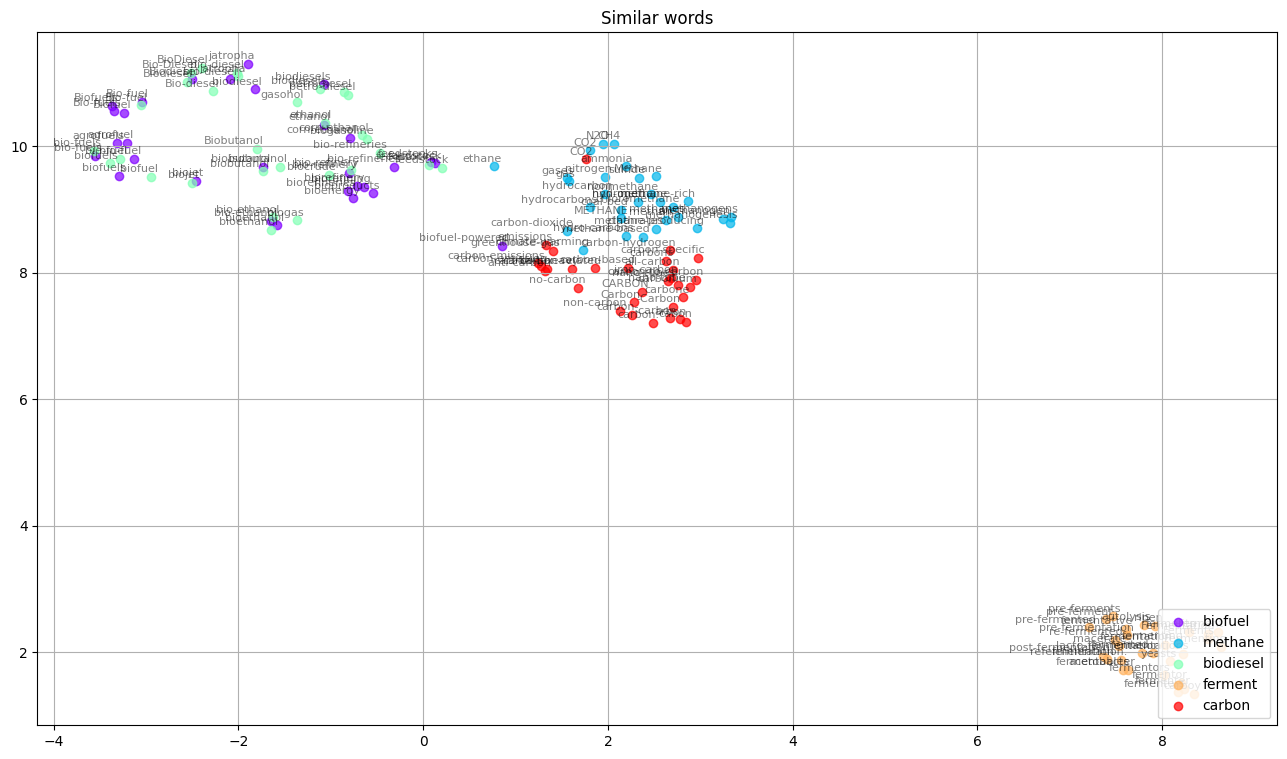

In [81]:
  embedding_clusters_BIO = np.array(embedding_clusters_BIO)
n, m, k = embedding_clusters_BIO.shape
umap_model_en_2d_BIO = umap.UMAP(n_components=2)
embeddings_en_2d_BIO = np.array(umap_model_en_2d_BIO.fit_transform(embedding_clusters_BIO
                                                                   .reshape(n * m, k))).reshape(n, m, 2)

def plot_similar_words(title, labels, embedding_clusters, word_clusters, a, filename=None):
    plt.figure(figsize=(16, 9))
    colors = cm.rainbow(np.linspace(0, 1, len(labels)))
    for label, embeddings, words, color in zip(labels, embedding_clusters, word_clusters, colors):
        x = embeddings[:, 0]
        y = embeddings[:, 1]
        plt.scatter(x, y, c=color, alpha=a, label=label)
        for i, word in enumerate(words):
            plt.annotate(word, alpha=0.5, xy=(x[i], y[i]), xytext=(5, 2),
                         textcoords='offset points', ha='right', va='bottom', size=8)
    plt.legend(loc=4)
    plt.title(title)
    plt.grid(True)
    if filename:
        plt.savefig(filename, format='png', dpi=150, bbox_inches='tight')
    plt.show()


plot_similar_words('Similar words', keys_BIO, embeddings_en_2d_BIO, word_clusters_BIO, 0.7,
                        'similar_words.png')